In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('train.csv')
train = pd.DataFrame()
test = pd.read_csv('test.csv')

In [3]:
display(df.columns)
display(df.describe())
display(df.info())

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

None

In [4]:
display(df.isnull().sum()/len(df))

id                       0.000000
belongs_to_collection    0.798667
budget                   0.000000
genres                   0.002333
homepage                 0.684667
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.002667
popularity               0.000000
poster_path              0.000333
production_companies     0.052000
production_countries     0.018333
release_date             0.000000
runtime                  0.000667
spoken_languages         0.006667
status                   0.000000
tagline                  0.199000
title                    0.000000
Keywords                 0.092000
cast                     0.004333
crew                     0.005333
revenue                  0.000000
dtype: float64

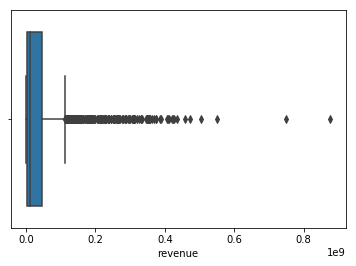

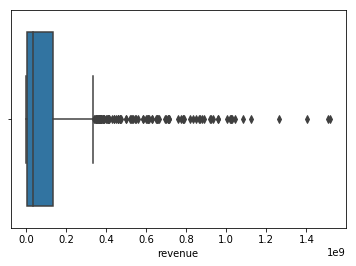

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    2.054000e+03
mean     4.216585e+07
std      7.474238e+07
min      1.000000e+00
25%      1.893915e+06
50%      1.232864e+07
75%      4.637010e+07
max      8.766885e+08
Name: revenue, dtype: float64

count    9.460000e+02
mean     1.200517e+08
std      2.091265e+08
min      1.000000e+00
25%      4.010988e+06
50%      3.545522e+07
75%      1.356870e+08
max      1.519558e+09
Name: revenue, dtype: float64

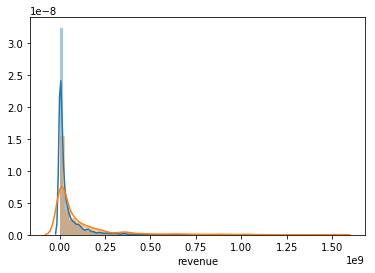

In [5]:
nullhomerev = df.loc[df['homepage'].isnull(), 'revenue']
homerev = df.loc[df['homepage'].notnull(), 'revenue']
sns.boxplot(nullhomerev)
plt.show()
sns.boxplot(homerev)
plt.show()
sns.distplot(nullhomerev)
sns.distplot(homerev)
display(nullhomerev.describe())
display(homerev.describe())
hashomepage = np.array(df.homepage.isna(), dtype=int)
train['hashomepage'] = hashomepage

In [6]:
df.drop('belongs_to_collection', axis = 1)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After t

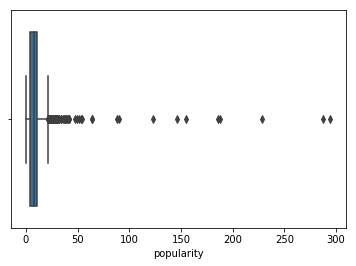

In [7]:
sns.boxplot(df['popularity'])
popscaler = preprocessing.StandardScaler()
train['popularity'] = popscaler.fit_transform(np.array(df['popularity']).reshape(-1,1))

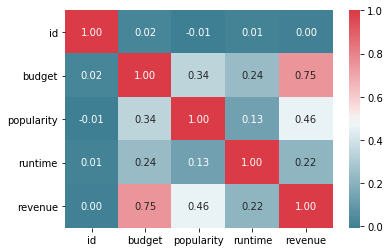

In [8]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=colormap, annot=True, fmt=".2f")


C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


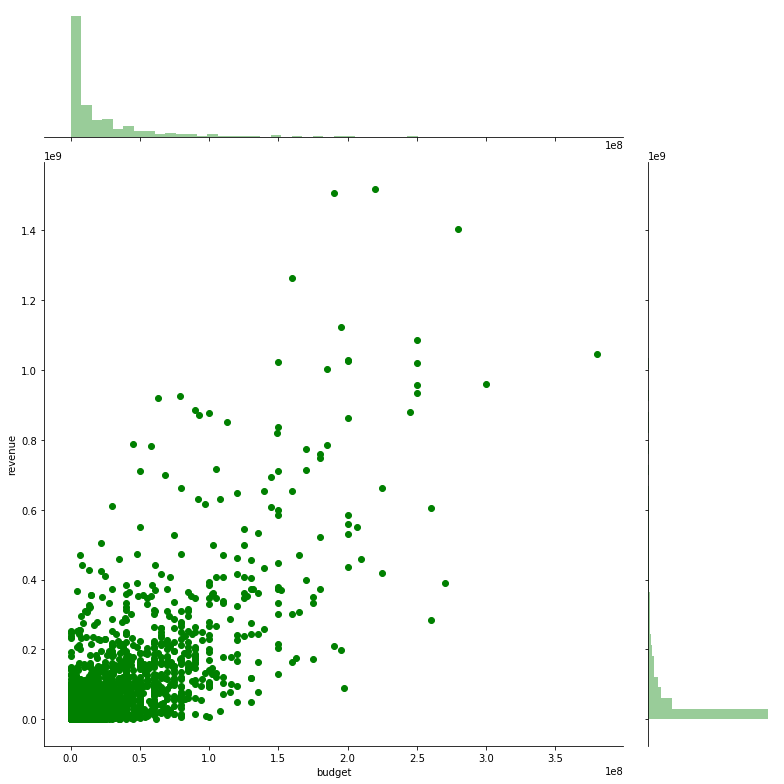

In [9]:
sns.jointplot(x="budget", y="revenue", data=df, height=11, ratio=4, color="g")
scaler = preprocessing.StandardScaler()
train['budget'] = scaler.fit_transform(np.array(df['budget']).reshape(-1,1))

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


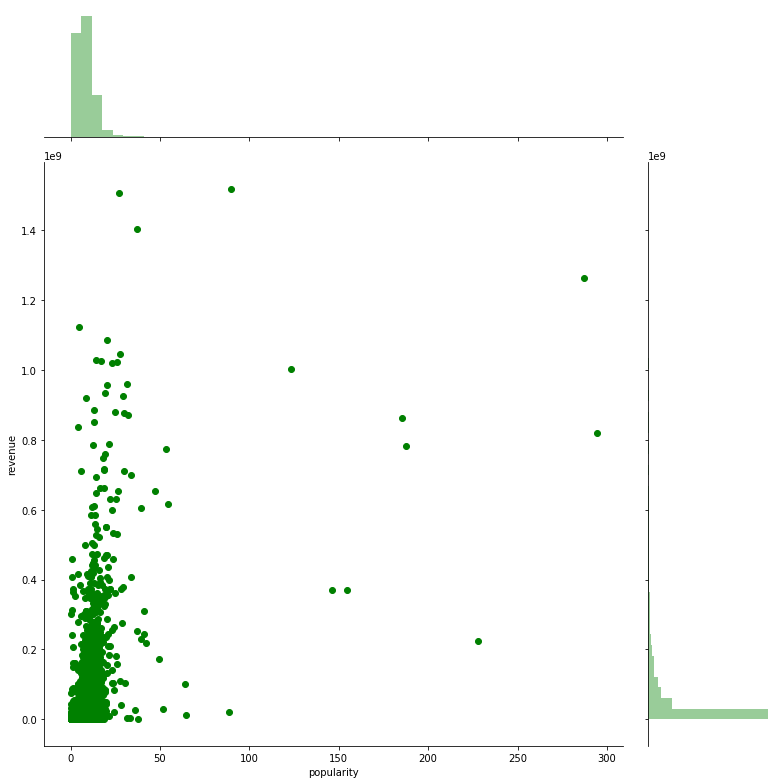

In [10]:
sns.jointplot(x="popularity", y="revenue", data=df, height=11, ratio=4, color="g")

In [11]:
df['runtime'] = df['runtime'].fillna(np.mean(df['runtime']))

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


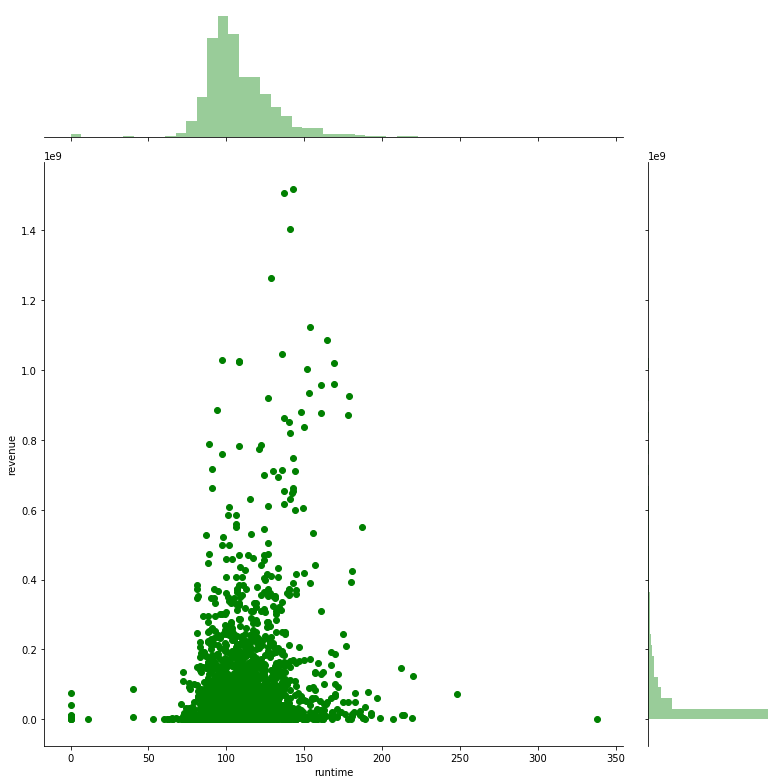

In [12]:
g = sns.jointplot(x='runtime', y="revenue", data=df, height=11, ratio=4, color="g")



In [13]:
from ast import literal_eval
import ast
def genrelist(df):
    genrelist = []
    for genre in df['genres']:
        if pd.isnull(genre):
            genrelist.append([])
        else:    
            genrelist.append([x['name'] for x in ast.literal_eval(genre)])
    df['genres'] = genrelist
def companieslist(df):
    companies = []
    for genre in df['production_companies']:
        if pd.isnull(genre):
            companies.append([])
        else:    
            companies.append([x['name'] for x in ast.literal_eval(genre)])
    df['production_companies'] = companies
genrelist(df)
companieslist(df)

In [14]:
genres= set()
for genrelists in df['genres']:
    for x in genrelists:
        genres.add(x)
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [16]:
avgrev = []
for g in genres:
    avgrev.append(np.mean(genrev[g]))


In [34]:
for genre in genres:
    one_hot = [1 if genre in x else 0 for x in df['genres']]
    train[genre + ' one hot'] = one_hot

In [35]:
companies= set()
for company in df['production_companies']:
    for x in company:
        companies.add(x)
companies
for company in companies:
    one_hot = [1 if company in x else 0 for x in df['production_companies']]
    train[company + ' one hot'] = one_hot

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2
train = pd.get_dummies(train)

In [37]:
selector = SelectKBest(chi2, k=5)
selector.fit(train, df['revenue'])

ValueError: Input X must be non-negative.

In [38]:
train.head()

,hashomepage,popularity,budget,Foreign one hot,Western one hot,Documentary one hot,Music one hot,TV Movie one hot,Crime one hot,Horror one hot,...,Misha Films one hot,Cinelou Films one hot,Les Films d'Ici one hot,Firsttake Entertainment one hot,Non-Stop Productions one hot,Turman-Foster Company one hot,Producers Sales Organization one hot,Caliber Media Company one hot,Kind Hearts Entertainment one hot,No Such Productions one hot
0,1,-0.155998,-0.230453,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.017714,0.471872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.613849,-0.519486,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.436981,-0.576212,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.604463,-0.608627,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
